# 1. Minha primeira analise de dados. 

Os dados a seguir foram fornecidos pelo site www.kaggle.com.

Temos como objetivo traçar congruências e identificar o perfil de maior adesão a esses fatores de risco em problemas cardiovasculares. Com esse perfil, podemos ajudar de várias formas, como:

- Auxiliar na identificação de um possível paciente antes que o problema seja desenvolvido.
- Trazer maior agilidade em consultas médicas.
- Levar conhecimento a pessoas com dúvidas sobre se necessitam de ajuda profissional médica.

Perguntas que tentaremos responder com a análise:

- O peso da pessoa está diretamente influenciando como fator de risco?
- Hábitos, sejam eles bons ou ruins, como fumar, ingerir álcool ou ser fisicamente ativo, podem interferir no desenvolvimento ou na prevenção?
- Os níveis de colesterol têm uma correlação com os problemas cardiovasculares?
- Os níveis de pressão podem inferir uma predição de doenças cardiovasculares? ap_hi normal = 120 / ap_lo normal = 80.
        

Fonte do dataset: https://www.kaggle.com/datasets/thedevastator/exploring-risk-factors-for-cardiovascular-diseas

In [102]:
import pandas as pd 
import numpy as np
from ydata_profiling import ProfileReport

import math
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [103]:
data_heart = pd.read_csv('C:/Users/lokpe/Documents/DataSets/heart_data.csv', sep=',', skiprows=None)
data_heart.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Como podemos ver, a idade (age) está de uma maneira não muito agradável aos olhos, ela é contada em dias; vamos ajustar para anos.

In [104]:
data_heart['age'] = data_heart['age']/365
data_heart['age'] = data_heart['age'].astype(int)

In [105]:
data_heart.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


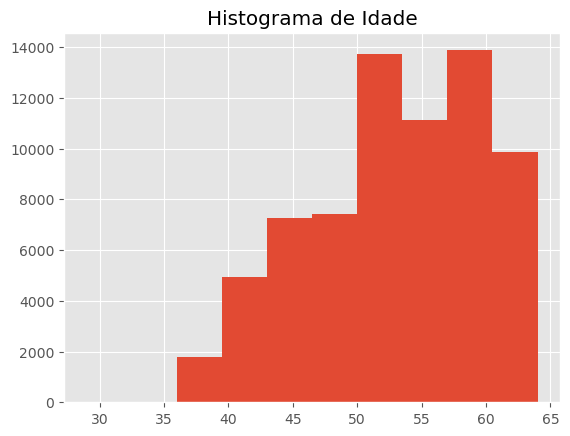

In [106]:
_ = plt.hist(data_heart.age)
_ = plt.title('Histograma de Idade')

Podemos verificar que entre os indivíduos que foram testados e acompanhados se destacam os de idade entre 55 a 60 anos, com uma leve cauda para a esquerda.

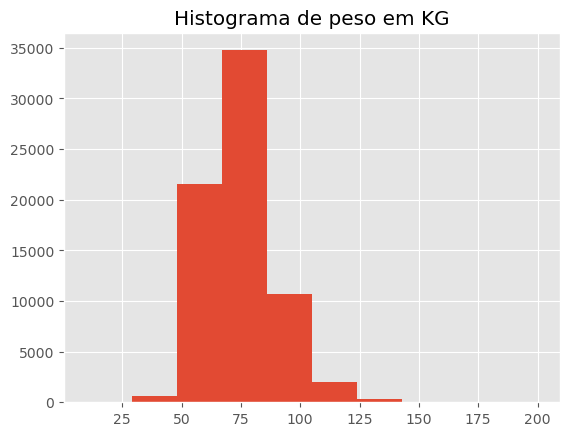

In [107]:
_ = plt.hist(data_heart.weight)
_ = plt.title('Histograma de peso em KG')

Observamos que entre os indivíduos existe uma predominância nos indivíduos de 75 kg.

Agora que temos ambos os dados de peso e idade, vamos adicionar uma nova coluna: Índice de Massa Corporal (IMC) e calcular os níveis de IMC dos indivíduos.

In [108]:
data_heart['imc'] = 10000*data_heart['weight']/(data_heart['height']*data_heart['height'])



In [109]:
condicoes = [(data_heart['imc']< 18.5), ((data_heart['imc'] >= 18.5) & (data_heart['imc'] < 25)),
             ((data_heart['imc'] >= 25) & (data_heart['imc'] < 30)),(data_heart['imc'] >= 30)]

parametros = ['Baixo peso', 'Normal', 'Sobrepeso', 'Obesidade']

data_heart['imc'] = np.select(condicoes, parametros, default = np.nan)
data_heart.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,imc
0,0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,Normal
1,1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,Obesidade
2,2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,Normal
3,3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,Sobrepeso
4,4,4,47,1,156,56.0,100,60,1,1,0,0,0,0,Normal


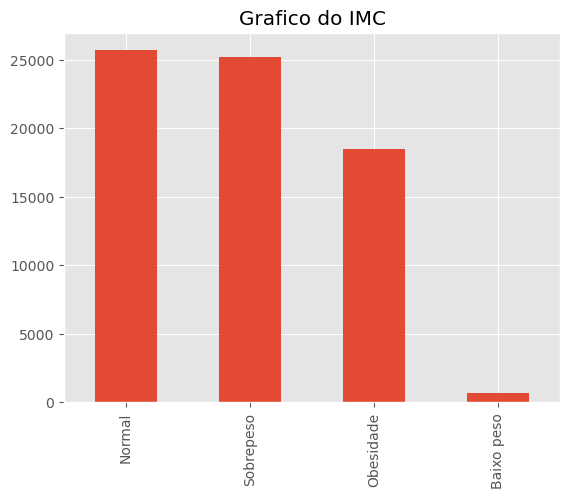

In [110]:
data_heart.imc.value_counts().plot.bar()
plt.title('Grafico do IMC')
plt.show()

Como podemos observar nos gráficos acima, o sobrepeso e o peso normal com base no IMC estão próximos. Logo em seguida, vemos o gráfico de obesidade bem acentuado. É preocupante que o nível de obesidade esteja tão alto em comparação com situações menos preocupantes, como o estado de normalidade e o sobrepeso.

Agora que temos uma parte visualmente concreta dos dados isolados, usaremos análise bivariada para mesclar e responder às perguntas que foram propostas.

# Hábitos maliciosos

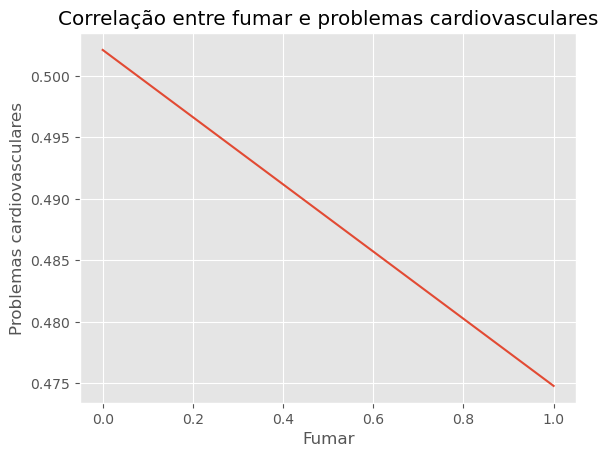

In [111]:
plt.plot(data_heart['smoke'].unique(), data_heart.groupby('smoke')['cardio'].mean())

plt.title("Correlação entre fumar e problemas cardiovasculares")
plt.xlabel("Fumar")
plt.ylabel("Problemas cardiovasculares")
plt.show()

Como podemos observar, os dados mostram que pessoas que têm o hábito do tabagismo têm chances maiores de desenvolver problemas cardiovasculares, pois à medida que nos aproximamos do valor 1, os problemas cardiovasculares também aumentam.

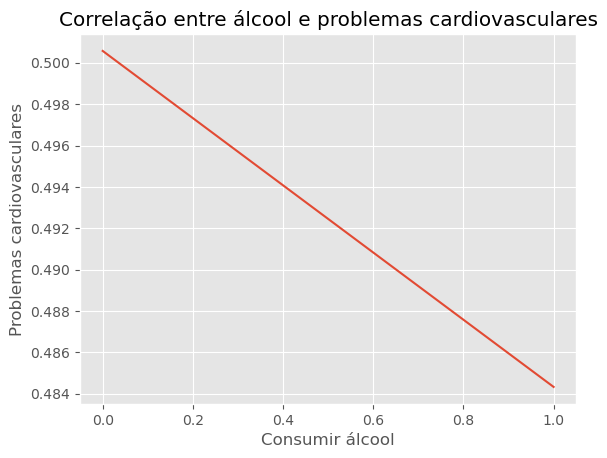

In [112]:
plt.plot(data_heart['alco'].unique(), data_heart.groupby('alco')['cardio'].mean())

plt.title("Correlação entre álcool e problemas cardiovasculares")
plt.xlabel("Consumir álcool")
plt.ylabel("Problemas cardiovasculares")
plt.show()

Assim como no gráfico acima, o álcool também é um fator agravante quando o assunto se refere a problemas cardiovasculares, ainda mais do que o ato de fumar, porém nada alarmante. É também importante ressaltar que não é uma relação totalmente comprometida

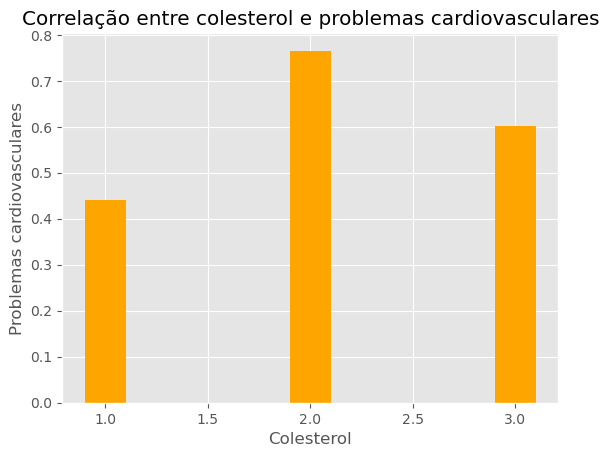

In [113]:
plt.bar(data_heart['cholesterol'].unique(), data_heart.groupby('cholesterol')['cardio'].mean(), color = 'orange', width = 0.2)

plt.title("Correlação entre colesterol e problemas cardiovasculares")
plt.xlabel("Colesterol")
plt.ylabel("Problemas cardiovasculares")
plt.show()

Como podemos observar, as pessoas com o colesterol em níveis maiores têm quase duas vezes mais chances de desenvolverem problemas cardiovasculares. 

# Hábitos benéficos

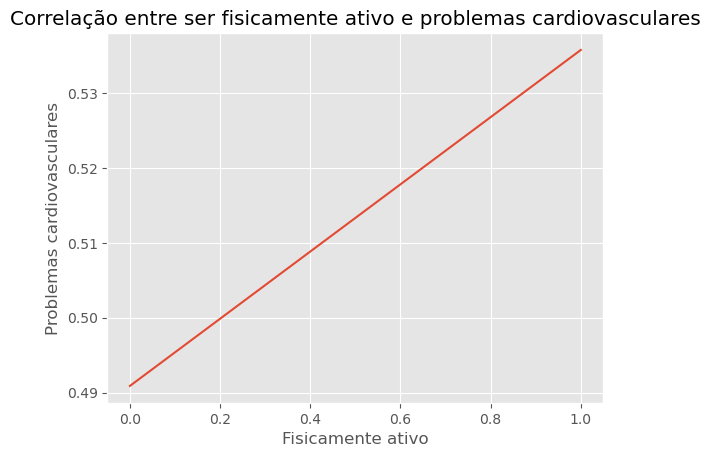

In [114]:
plt.plot(data_heart['active'].unique(), data_heart.groupby('active')['cardio'].mean())

plt.title("Correlação entre ser fisicamente ativo e problemas cardiovasculares")

plt.xlabel ("Fisicamente ativo")
plt.ylabel("Problemas cardiovasculares")
plt.show()



O gráfico acima mostra que pessoas que praticam atividade física tem menos chances de desenvolver problemas cardiovasculares, pois, a medida que aumentamos o valor das pessoas fisicamente ativas a chance delas terem problemas cardiovasculares diminui.

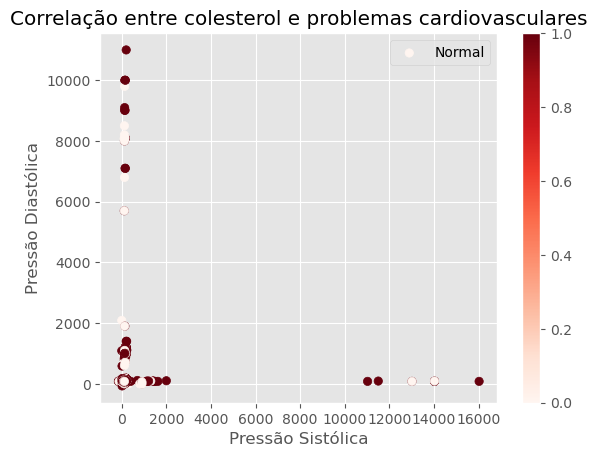

In [115]:
plt.scatter(data_heart['ap_hi'],data_heart['ap_lo'],c = data_heart['cardio'], cmap="Reds")

plt.title("Correlação entre colesterol e problemas cardiovasculares")
plt.xlabel("Pressão Sistólica")
plt.ylabel("Pressão Diastólica")
plt.legend(["Normal", "Anormal"])
plt.colorbar()
plt.show()


De acordo com o gráfico, indivíduos com pressão arterial sistólica e diastólica mais alta têm um risco significativamente maior de desenvolver doenças cardíacas em comparação com aqueles com pressão arterial sistólica e diastólica mais baixa. Podemos observar tambem com o gráfico, os indivíduos com doença cardíaca apresentam pressão arterial sistólica e diastólica elevada em comparação com aqueles sem a doença.